In [1]:
import torch

### task 1

In [12]:
def find_x_derivative(x, y):

    x = torch.tensor(x, dtype=float, requires_grad=True)

    y = torch.tensor(y, dtype=float, requires_grad=True)

    out = torch.sin(torch.tan(x)*(x*x/y) + torch.log( torch.exp(-x*x+3) + x*x*x*y) ) * torch.tan( x*x*(torch.exp(x**9)) )

    out.sum().backward()   

    return x.grad

In [13]:
find_x_derivative(1, 1)

tensor(-16.5969, dtype=torch.float64)

In [17]:
A = torch.randn(4, 4)
A.numpy()
A

tensor([[-0.7138,  0.7017, -2.2010, -1.6439],
        [-1.8787, -2.1259, -0.5690,  1.5504],
        [ 0.0221,  0.3885,  0.3155, -1.4267],
        [ 0.1993, -0.8237,  0.0617, -0.6981]])

In [18]:
B = torch.randn(4, 4)
B.numpy()
B

tensor([[ 0.2868,  1.0175, -0.5710,  0.4376],
        [ 0.9344, -0.9070,  0.1475,  0.3751],
        [-0.6005,  0.4141,  0.5256, -0.7998],
        [ 0.3191,  1.0637, -2.3544,  1.8850]])

In [19]:
find_x_derivative(A, B)

C:\Users\snetkova\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\snetkova\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


tensor([[ 1.6581e+00,  3.2120e-02,  0.0000e+00,         nan],
        [        nan,  0.0000e+00, -2.6308e-01,  1.9314e+26],
        [ 6.2909e-03,  4.8004e-02,  1.1512e-01, -4.5745e-09],
        [ 6.2620e-02, -4.2475e-01,  1.8371e-02, -1.9586e+00]],
       dtype=torch.float64)

### task 2

In [4]:
def get_cos_sim(A, B):
    A = torch.tensor(A, dtype = float)
    B = torch.tensor(B, dtype = float)
    B = B.t()
    
    norm_a = torch.norm(A, dim=1)
    norm_b = torch.norm(B, dim=0)

    A = A / norm_a
    B = B / norm_b
    B = B.t()

    return torch.mm(A, B)

In [5]:
A = torch.randn(4, 4)
A.numpy()
A

tensor([[-2.9841, -1.1702, -1.7206,  0.2242],
        [-2.2058, -0.8907, -1.5710, -1.8708],
        [ 0.7357,  0.9326, -0.0991, -2.7605],
        [-0.5001,  0.2140, -0.8730,  1.0062]])

In [6]:
B = torch.randn(4, 4)
B.numpy()
B

tensor([[-1.5335, -0.3337, -0.0781, -0.5195],
        [-0.5484,  0.1746,  0.8787, -0.2009],
        [-1.4641,  0.0897,  1.0243,  0.2871],
        [-0.3847, -0.1009,  0.7416, -0.8093]])

In [7]:
get_cos_sim(A, B)

C:\Users\snetkova\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
C:\Users\snetkova\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


tensor([[ 1.3456,  0.0672, -0.4679,  0.1228],
        [ 1.5452,  0.1659, -1.3073,  1.0575],
        [ 0.3315,  0.1682, -1.0220,  1.2099],
        [ 0.0991, -0.0369,  0.3381, -0.4995]], dtype=torch.float64)

### task 3

In [8]:
from torch import nn 
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения
%matplotlib inline
import torch, torchvision
import torch.nn.functional as F
import pandas as pd

In [9]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [10]:
train_dataset = torchvision.datasets.FashionMNIST(root='',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)


image, label = train_dataset[0]
print (image.size())
print (label)

torch.Size([1, 28, 28])
9


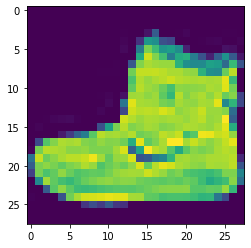

In [11]:
plt.imshow(image.permute(1, 2, 0).numpy())
plt.show()

In [12]:
test_dataset = torchvision.datasets.FashionMNIST(root='', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

In [13]:
classes = ('Tshirt', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'AnkleBoot')

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device('cpu')

In [15]:
class FashionCNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2)
            )    

        self.layer2 = nn.Sequential(
                nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2)
            ) 
        
        
        self.fc1 = nn.Linear(64 * 7 * 7, 600) #почему 7?
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out
    

In [16]:
PATH = 'base_model.pth'

In [17]:
base_net = FashionCNN().to(device)
torch.save(base_net.state_dict(), PATH) #пригодится для сравнения результатов
print(base_net)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=3136, out_features=600, bias=True)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [18]:
net1 = FashionCNN().eval().to(device)
net1.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net1.parameters(), lr=0.001, momentum=0.9)

In [20]:
%%time

net1.train()
for epoch in range(5):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]
        inputs, labels = inputs.to(device), labels.to(device)

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001
[1,   301] loss: 0.345
[1,   601] loss: 0.345
[1,   901] loss: 0.344
[2,     1] loss: 0.001
[2,   301] loss: 0.260
[2,   601] loss: 0.122
[2,   901] loss: 0.110
[3,     1] loss: 0.000
[3,   301] loss: 0.099
[3,   601] loss: 0.095
[3,   901] loss: 0.091
[4,     1] loss: 0.000
[4,   301] loss: 0.087
[4,   601] loss: 0.081
[4,   901] loss: 0.079
[5,     1] loss: 0.000
[5,   301] loss: 0.077
[5,   601] loss: 0.072
[5,   901] loss: 0.072
Training is finished!
Wall time: 51.3 s


In [21]:
def calc_accuracy(model):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total


In [22]:
res = {}
res['SGD'] = calc_accuracy(net1)

In [23]:
pd.DataFrame.from_dict(res, orient='index', columns = ['acc_test'])

,acc_test
SGD,0.8161


### optimizers

In [24]:
net2 = FashionCNN().eval().to(device)
net2.load_state_dict(torch.load(PATH))

    
criterion2 = nn.CrossEntropyLoss()
optimizer2 = optim.Adagrad(net2.parameters(), lr=0.001) 

net2.train()
for epoch in range(5):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]
        inputs, labels = inputs.to(device), labels.to(device)

        # обнуляем градиент
        optimizer2.zero_grad()

        outputs = net2(inputs)
        loss = criterion2(outputs, labels)
        loss.backward()
        optimizer2.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

res['Adagrad'] = calc_accuracy(net2)

[1,     1] loss: 0.001
[1,   301] loss: 0.129
[1,   601] loss: 0.098
[1,   901] loss: 0.089
[2,     1] loss: 0.000
[2,   301] loss: 0.084
[2,   601] loss: 0.081
[2,   901] loss: 0.076
[3,     1] loss: 0.000
[3,   301] loss: 0.074
[3,   601] loss: 0.074
[3,   901] loss: 0.072
[4,     1] loss: 0.000
[4,   301] loss: 0.070
[4,   601] loss: 0.068
[4,   901] loss: 0.068
[5,     1] loss: 0.000
[5,   301] loss: 0.067
[5,   601] loss: 0.066
[5,   901] loss: 0.065
Training is finished!


In [25]:
net3 = FashionCNN().eval().to(device)
net3.load_state_dict(torch.load(PATH))
    
criterion3 = nn.CrossEntropyLoss()
optimizer3 = optim.Adam(net3.parameters(), lr=0.001) 

net3.train()
for epoch in range(5):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]
        inputs, labels = inputs.to(device), labels.to(device)

        # обнуляем градиент
        optimizer3.zero_grad()

        outputs = net3(inputs)
        loss = criterion3(outputs, labels)
        loss.backward()
        optimizer3.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

res['Adam'] = calc_accuracy(net3)

[1,     1] loss: 0.001
[1,   301] loss: 0.101
[1,   601] loss: 0.057
[1,   901] loss: 0.051
[2,     1] loss: 0.000
[2,   301] loss: 0.043
[2,   601] loss: 0.041
[2,   901] loss: 0.039
[3,     1] loss: 0.000
[3,   301] loss: 0.036
[3,   601] loss: 0.035
[3,   901] loss: 0.035
[4,     1] loss: 0.000
[4,   301] loss: 0.031
[4,   601] loss: 0.032
[4,   901] loss: 0.031
[5,     1] loss: 0.000
[5,   301] loss: 0.028
[5,   601] loss: 0.029
[5,   901] loss: 0.030
Training is finished!


In [26]:
pd.DataFrame.from_dict(res, orient='index', columns = ['acc_test'])

,acc_test
SGD,0.8161
Adagrad,0.8352
Adam,0.9125


Adam дает более высокий результат на тесте

### predictions

In [27]:
data_iter = iter(test_loader)
images, labels = data_iter.next()
images, labels = images.to(device), labels.to(device)

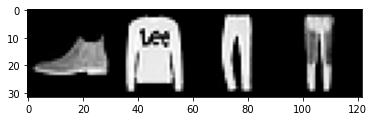

In [28]:
outputs = net3(images)
imgs = torchvision.utils.make_grid(images)
imgs.permute(1, 2, 0).cpu().numpy()

plt.imshow(imgs.permute(1, 2, 0).cpu().numpy())
plt.show()

In [29]:
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

GroundTruth:  AnkleBoot Pullover Trouser Trouser
Predicted:  AnkleBoot Pullover Trouser Trouser
